# ZADANIE 1

a) Wykonaj poniższy skrypt i przeanalizuj go:

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

from ipywidgets import *
from numpy import pi, sin
from numpy.fft import fft, ifft, fftfreq

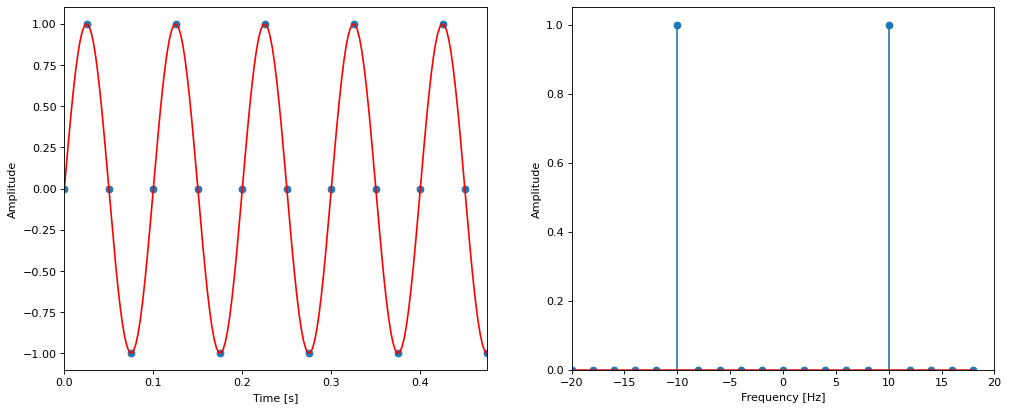

In [3]:
def plot_sin(A=1, f=2.0, LP=1, w=40):
    T = 1.0/f
    TW = 1.0/w
    func = lambda t: A*np.sin(2*pi*t*f)
    plot_signal(func, x1=0, x2=LP*T, step=TW)
    
def fftfreq2(N, w=1):
    if N == 1: return [0]
    n = N if N % 2 == 0 else N - 1
    q = -1 if N % 2 == 0 else 0
    a = np.arange(0, n/2+q+1, 1)
    b = np.arange(-n/2, 0, 1)
    return np.hstack((a, b)) / (n*w)
    
def plot_signal(func, x1=0, x2=1, step=0.1):
    xs1 = np.arange(x1, x2, step)
    ys1 = func(xs1)
    N = len(ys1)
    w = 1 / step

    xs2 = np.linspace(x1, x2, 200)
    ys2 = [func(x) for x in xs2]
    
    xs3 = fftfreq2(N, 1 / w)
    ys3 = np.abs(fft(ys1)) * 2 / N
    
    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ax.plot(xs1, ys1, 'o')
    ax.plot(xs2, ys2, '-', color='red')
    ax.set_xlim(0, xs1[-1])
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Amplitude')
    
    ax = fig.add_subplot(122)
    plt.stem(xs3, ys3, '-*')
    ax.set_xlim(-w/2, w/2)
    ax.set_ylim(0)
    ax.set_xlabel('Frequency [Hz]')
    ax.set_ylabel('Amplitude')
    # dlaczego nie ma jednego słupka na 30Hz
    # to dyskretna transformata i nie można reprezentować
    plt.show()
    
plot_sin(A=1, LP=5, f=10, w=40)

b) Zmień częstotliwość próbkowania na 50Hz.

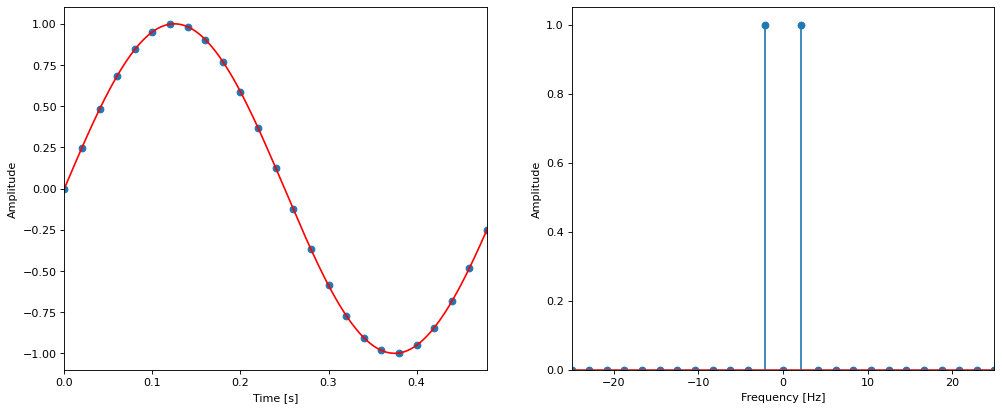

In [4]:
# w=50
plot_sin(w=50)

c) Punkty na osi OX spektrum są teraz kolejnymi liczbami naturalnymi, a nie częstotliwościami w Hz. Popraw skrypt (funkcje), tak aby oś OX spektrum była w Hz (podpowiedź: oś OX rozpoczyna się od 0Hz, a kończy się na (prawie!)  Hz, gdzie  jest częstotliwością próbkowania). Następnie: Upewnij się, że spektrum dla 1Hz-owego sinusa i pięciu (LP=5) analizowanych przebiegów wygląda teraz prawidłowo.

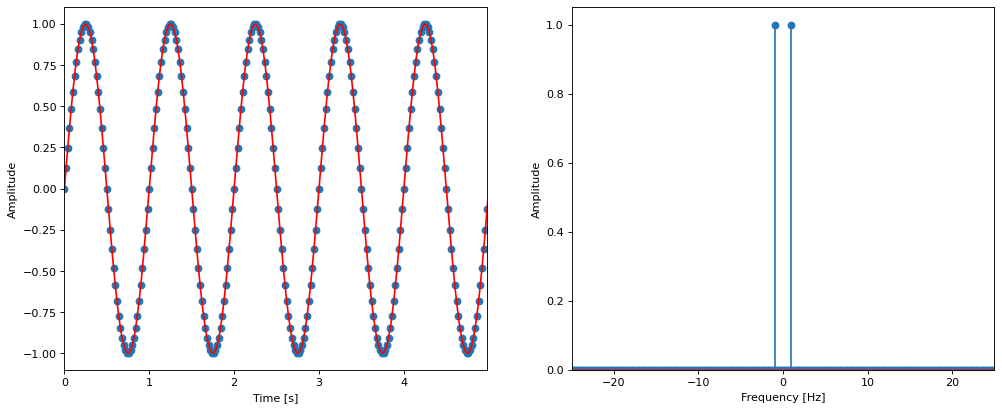

In [5]:
# popraw oś OX
plot_sin(f=1, LP=5, w=50)

d) Podpisz osie obu wykresów, używając funkcji xlabel() i ylabel(). Pamiętaj o jednostkach.

In [6]:
# Podpisz osie wykresów

f) Porównaj spektrum funkcji $sin(2*pi*f*t)$, $2*sin(2*pi*f*t)$ i $3*sin(2*pi*f*t)$. Jak zmienia się wartość na osi OY na wykresie spektrum?

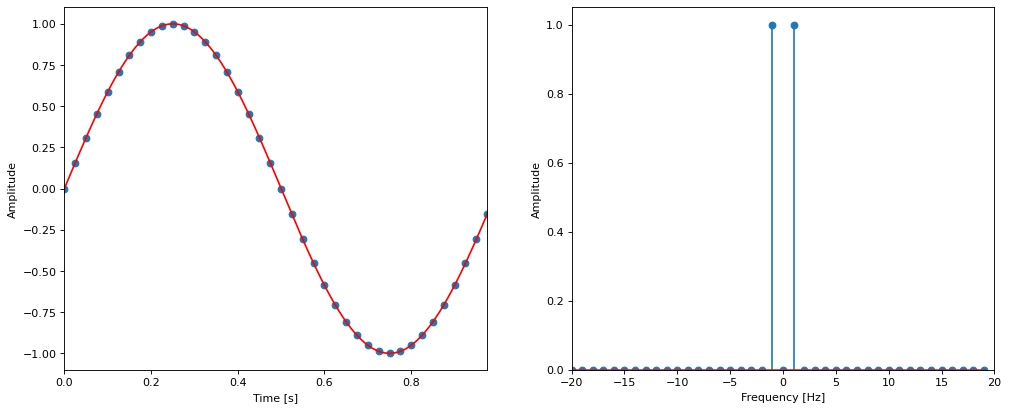

In [7]:
plot_sin(f=1, A=1, LP=1)

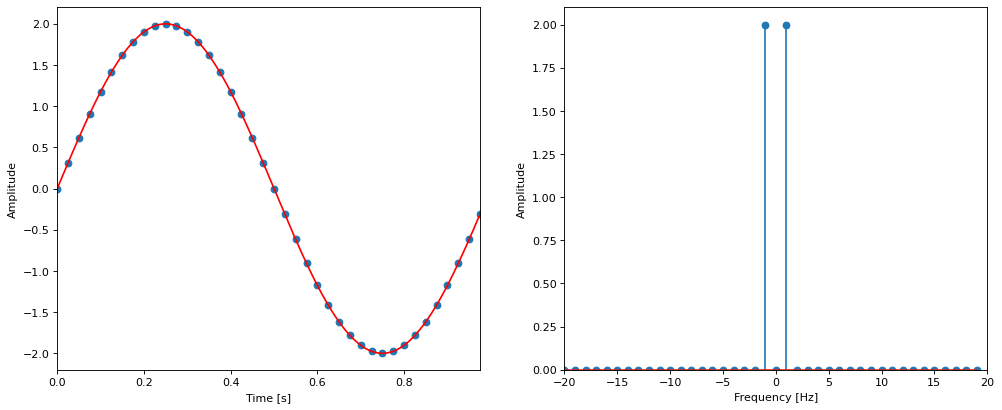

In [8]:
plot_sin(f=1, A=2, LP=1)

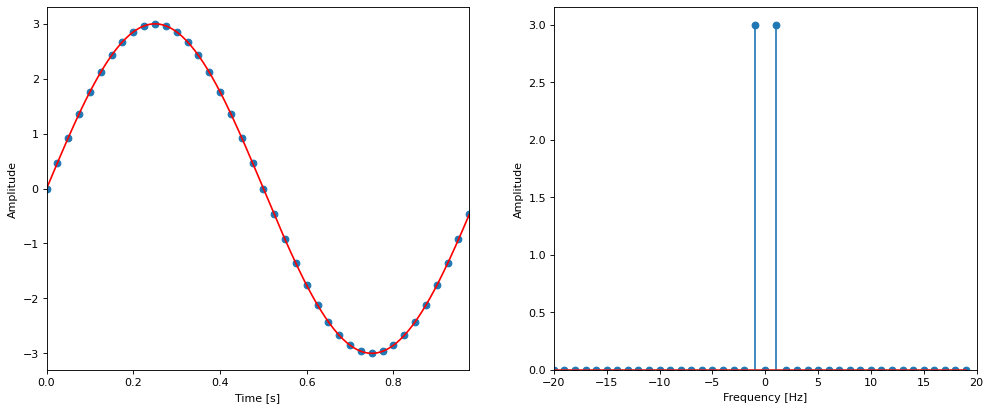

In [9]:
plot_sin(f=1, A=3, LP=1)

g) Ile punktów jest na wykresach przy częstotliwości próbkowania 50Hz, T=1s? Zwiększ dwukrotnie liczbę próbek poprzez zwiększenie częstotliwości próbkowania. Następnie: dla $sin(2*pi*f*t)$ porównaj wartość na osi OY spektrum uzyskane w tym oraz poprzednim punkcie.

Odp: nie zmienia się

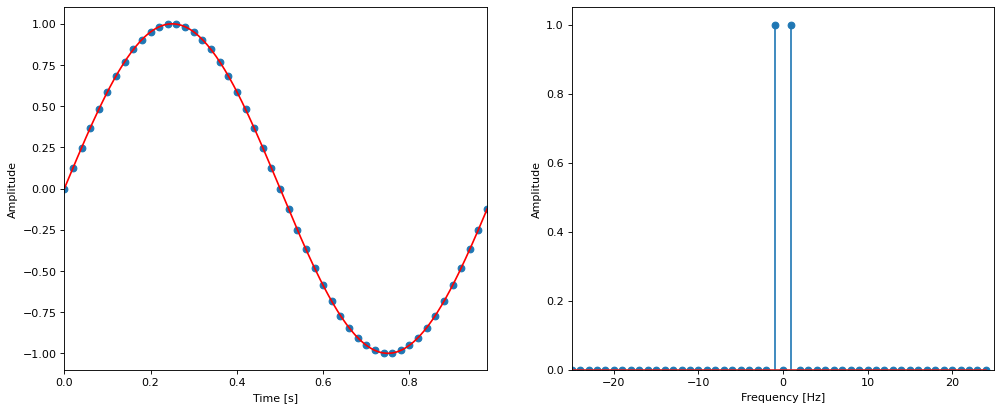

In [10]:
plot_sin(f=1, w=50, LP=1)

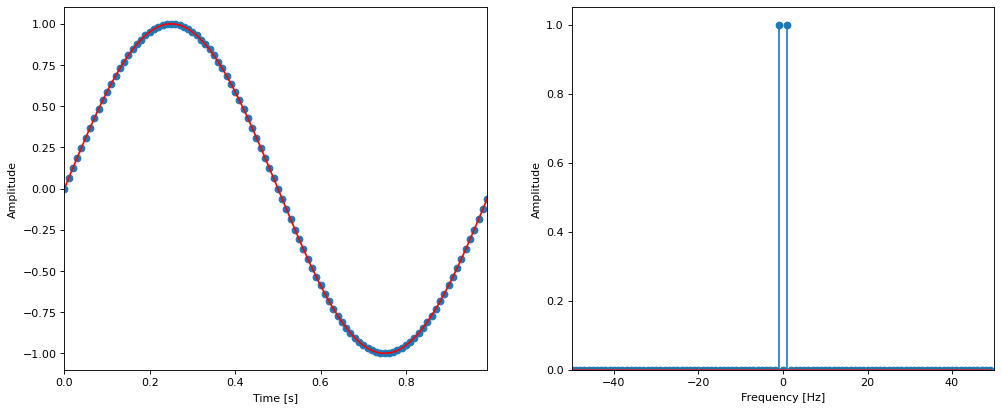

In [11]:
plot_sin(f=1, w=100, LP=1)

h) Na podstawie wyników uzyskanych w dwóch poprzednich punktach przeskaluj oś OY spektrum tak, aby wskazywała wartości amplitud badanych sygnałów. Sprawdź wyniki dla kilku wybranych funkcji.

In [12]:
# popraw oś OY

# Zadanie 2

a) Wygeneruj spektrum dla funkcji sinus o częstotliwościach 5Hz i 21Hz, dla czestotliwości próbkowania 20Hz i 20 (LP=20) analizowanych przebiegów. Czy rozpoznajesz te funkcje patrząc na ich spróbkowane wykresy? Odczytaj w drugim przypadku uzyskaną częstotliwość z FFT. Dlaczego uzyskano taki wynik?

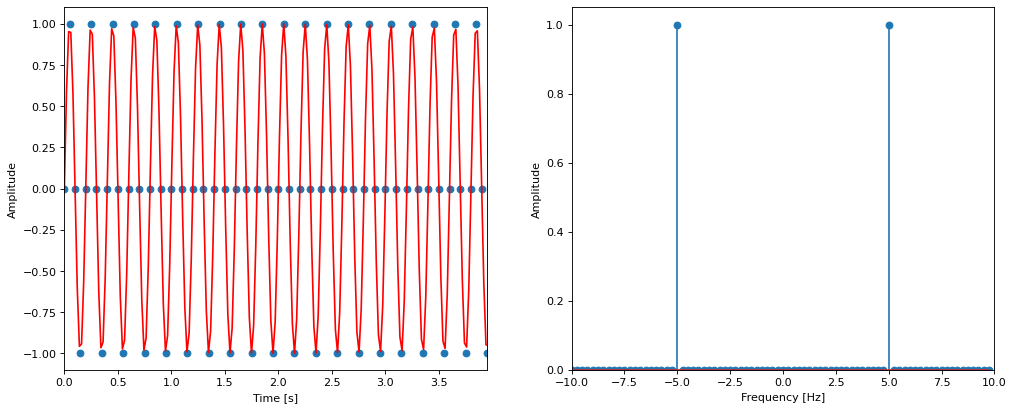

In [13]:
plot_sin(f=5, w=20, LP=20)

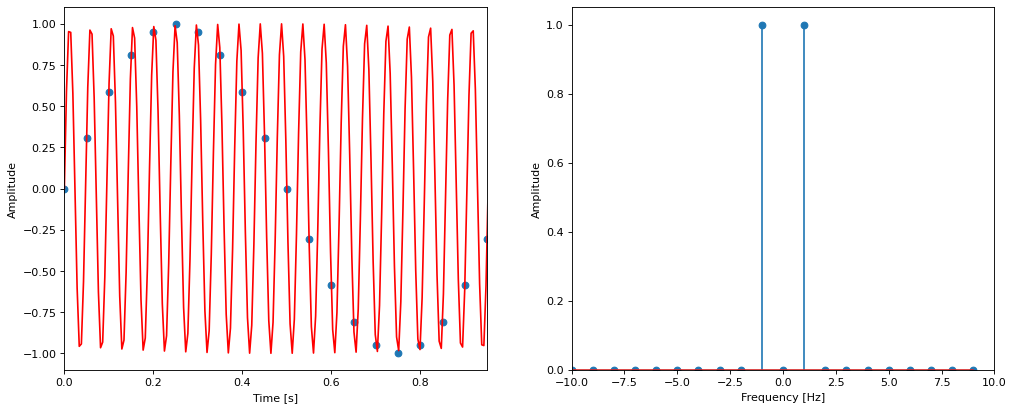

In [14]:
plot_sin(f=21, w=20, LP=20)

Zwróć uwagę, że spektrum jest symetryczne (poza pierwszym elementem).

b) Przy w=100Hz, przeanalizuj widma sygnałów:

i) $sin(2*pi*t*f)$, $f=10Hz$

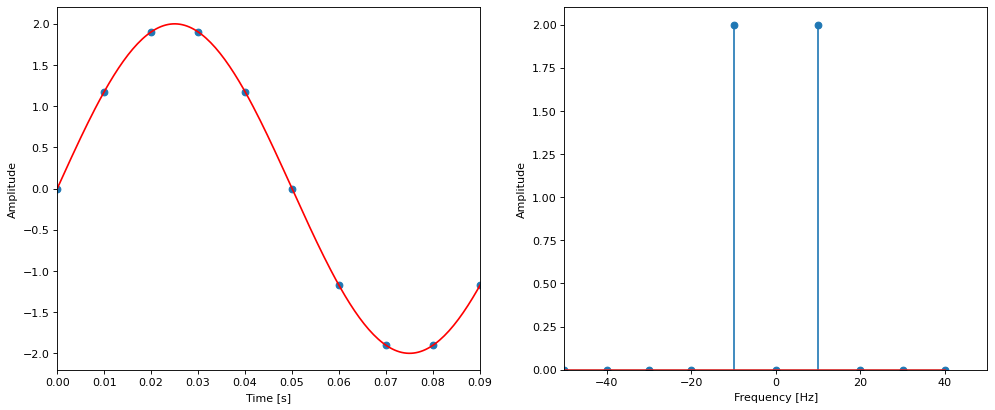

In [15]:
plot_sin(A=2, f=10, w=100)

ii) $sin(2*pi*t*f)$, $f=20Hz$

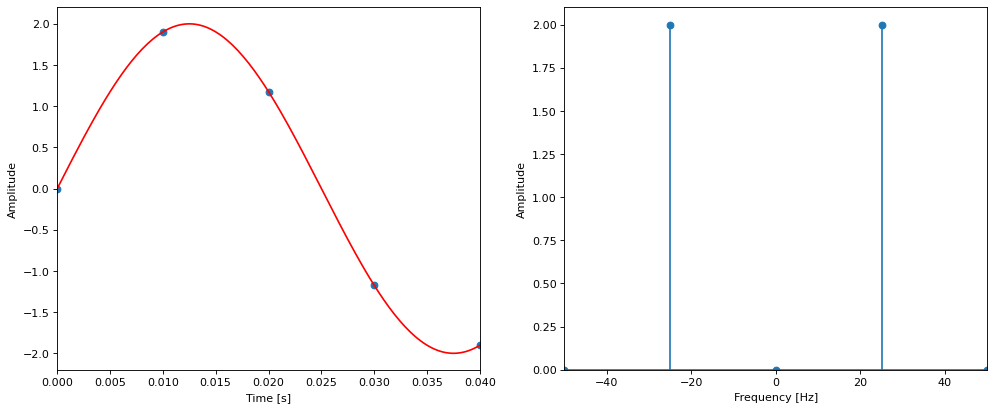

In [16]:
plot_sin(A=2, f=20, w=100)

iii) $sin(2*pi*t*f)$, $f=30Hz$ (tutaj słupki nie będą wyglądać idealnie; dlaczego?)

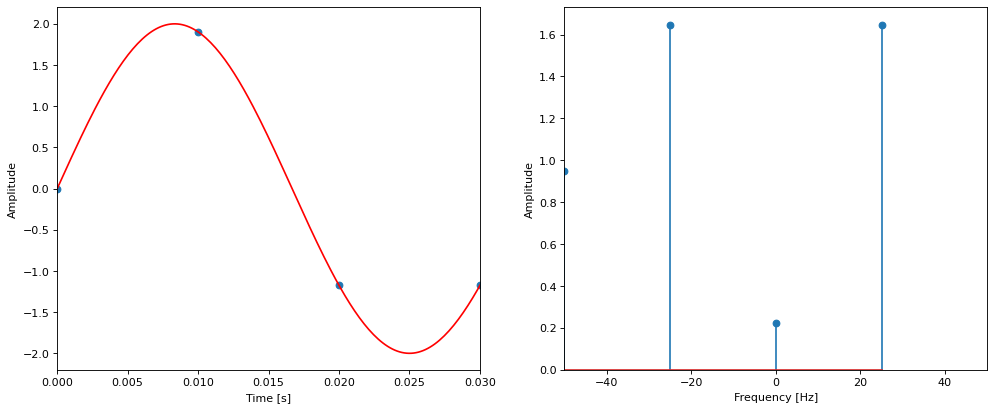

In [17]:
plot_sin(A=2, f=30, w=100)

iv) $sin(2*pi*t*f)$, $f=40Hz$

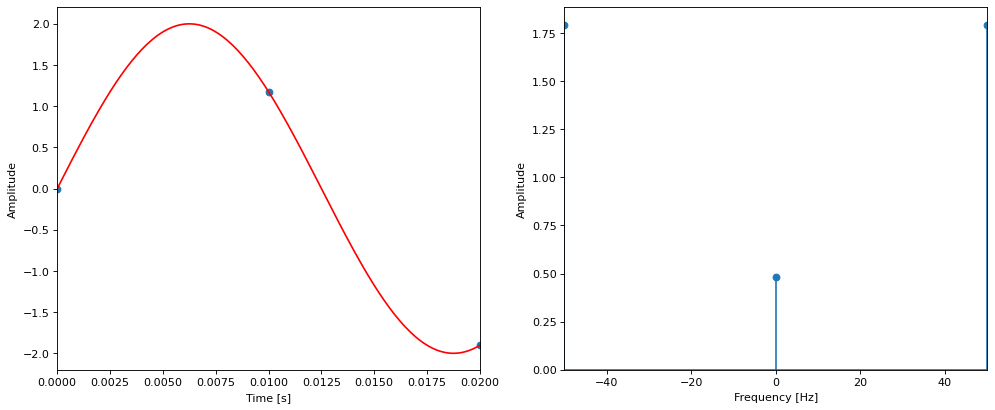

In [18]:
plot_sin(A=2, f=40, w=100)

c) Przy F=50Hz, w=100Hz, wygeneruj spektrum dla $sin(2*pi*f*t)$. Zwróć uwagę na skalę wykresów.

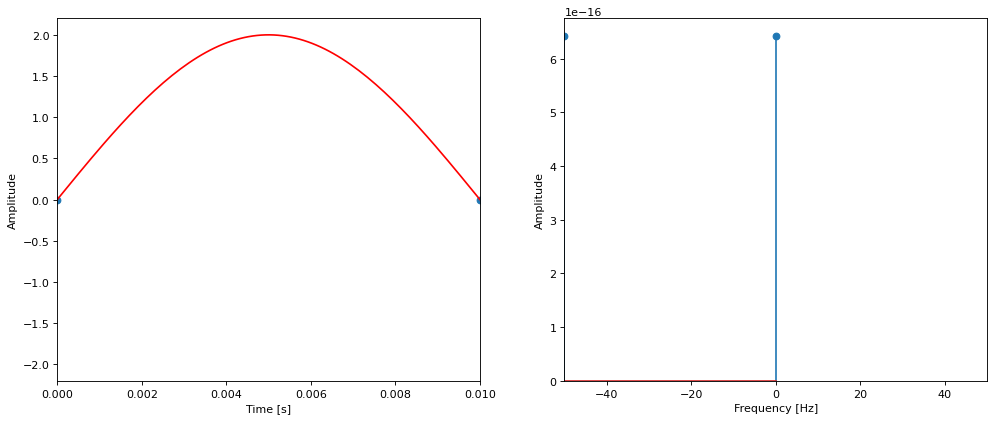

In [19]:
plot_sin(A=2, f=50, w=100)

c) Jak się nazywa twierdzenie, którego konsekwencją jest takie zachowanie się spektrum?

# Zadanie 3

Poniższe przypadki skłądają się z złożonych sygnałów. Trzeba teraz będzie zmodyfikować trochę FUNC

a) $sin(2*pi*t*f) + 2*sin(4*pi*t*f)$, T=1s, w=20Hz.

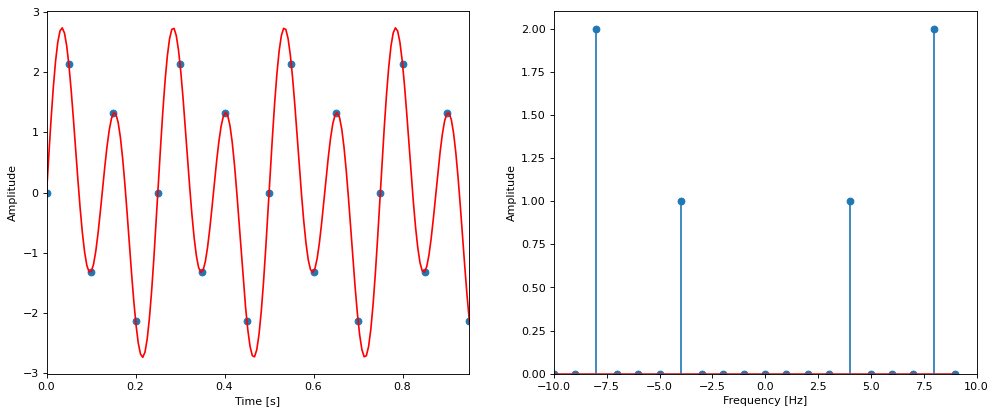

In [20]:
def plot_sin2(f, T, LP=1, w=40):
    func = lambda t: sin(2*pi*t*f) + 2*sin(4*pi*t*f)
    plot_signal(func, x2=LP*T, step=1/w)
    
plot_sin2(f=4, T=1, w=20)

c) Wygenerujemy trochę szumu. Wychodząc z funkcji $sin(2*pi*t*f)$, dodamy do niej 100 losowych sinusów. Wygenerujemy dla nich losowo amplitudy (z $[0.02, 0.08]$, częstotliwosci: $[5.0, 10.0]$ oraz modyfikacje fazy $[0, 2*pi]$. Inne parametry: w=20Hz, T=1s. Czy dla powyższych paramerów losowania, jesteś w stanie odnaleźć bazowy przebieg ($sin(2*pi*t)$)? Czy jesteś w stanie zlokalizować szum?

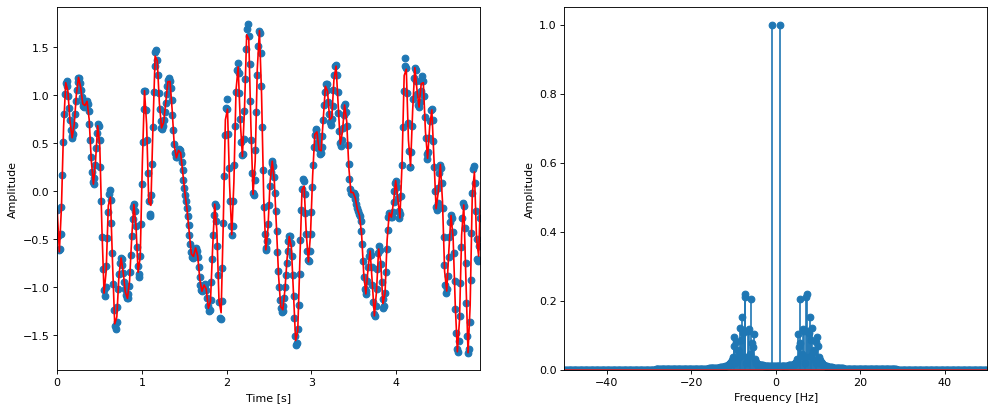

In [21]:
from random import uniform

random.seed(10)

def random_sin():
    A = uniform(0.02, 0.08)
    f = uniform(5.0, 10.0)
    p = uniform(0, 2*pi)
    return lambda t: A*sin(2*pi*t*f + p)
    
def plot_sin3(f, T, LP=1, w=40):
    noise = [random_sin() for _ in range(100)]
    func = lambda t: sin(2*pi*t*f) + sum(g(t) for g in noise)
    plot_signal(func, x2=LP*T, step=1/w)

plot_sin3(f=1, T=1, w=100, LP=5)

d) $0.5 + 2*sin(2*pi*t*f)$, T=1s, w=20Hz. Czy amplituda zerowego prążka jest prawidłowa? Dlaczego? (Podpowiedź: zwróć jeszcze raz uwagę na “symetrię” spektrum).

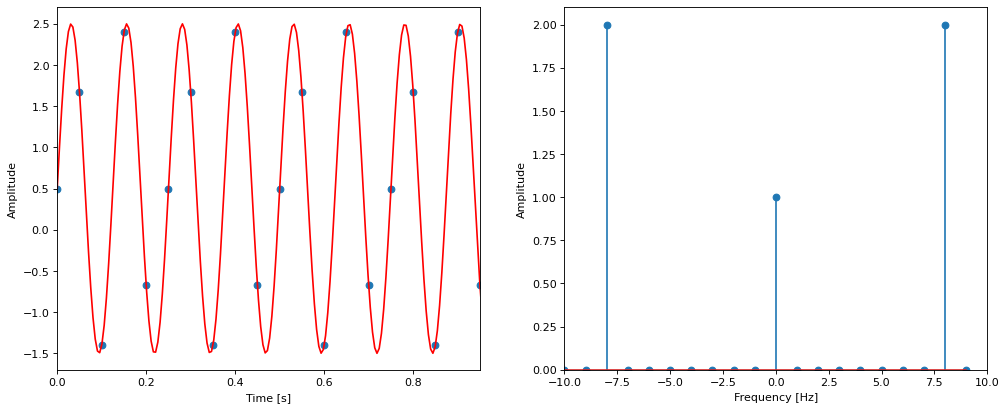

In [22]:
def plot_sin4(f, T, LP=1, w=40):
    func = lambda t: 0.5 + 2*sin(4*pi*t*f)
    plot_signal(func, x2=LP*T, step=1/w)
    
plot_sin4(f=4, T=1, w=20)

e) $sin(2*pi*t*f)$ oraz $sin(2*pi*t*f + pi/4)$ dla T=1s, w=20Hz. Czy informacja o fazie zniknęła? Poszukaj śladów tej informacji w tablicy, będącej wynikiem operacji fft(signal). (funkcja angle(sygnal, deg=True)

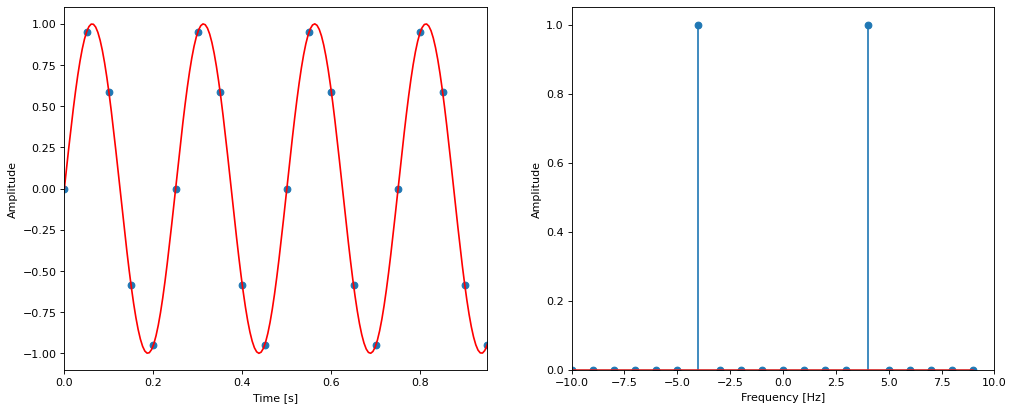

array([ 180., -108.,  -50.,   -3.,  -90.,  130., -149.,  165., -113.,
        -11.,    0.,   11.,  113., -165.,  149., -130.,   90.,    3.,
         50.,  108.])

In [23]:
def plot_sin5(f, T, LP=1, w=40):
    func = lambda t: sin(2*pi*t*f)
    plot_signal(func, x2=LP*T, step=1/w)
    ys = [func(x) for x in np.arange(0, LP*T, 1/w)]
    yf = np.fft.fft(ys)
    return np.round(np.angle(yf, deg=True))
    
plot_sin5(f=4, T=1, w=20)

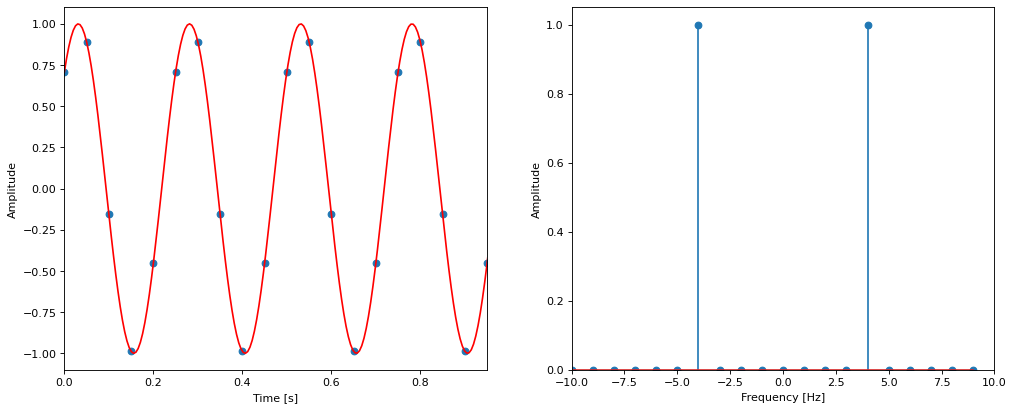

array([ 1.80000000e+02, -1.33805323e+02, -6.00239339e+01, -4.26094895e+01,
       -4.50000000e+01,  1.06876265e+02,  1.40229785e+02, -1.63210937e+02,
       -1.05524111e+02, -5.08728578e+01,  2.99346323e-15,  5.08728578e+01,
        1.05524111e+02,  1.63210937e+02, -1.40229785e+02, -1.06876265e+02,
        4.50000000e+01,  4.26094895e+01,  6.00239339e+01,  1.33805323e+02])

In [24]:
def plot_sin5(f, T, LP=1, w=40):
    func = lambda t: sin(2*pi*t*f + pi/4)
    plot_signal(func, x2=LP*T, step=1/w)
    return np.angle(fft(func(np.arange(0, LP*T, 1/w))), deg=True)
    
plot_sin5(f=4, T=1, w=20)

# Zadanie 4

Oblicz wynik ifft(fft(x)), gdzie x=random.random(10). Czy jakaś informacja została stracona?

In [25]:
# wygeneruj wektor x
x = np.random.random(10)
x

array([0.4386059 , 0.51822434, 0.36182868, 0.26784436, 0.03153417,
       0.9853091 , 0.78952886, 0.66881198, 0.27974964, 0.2227794 ])

In [26]:
# oblicz fft z x
fft(x)

array([ 4.56421644+0.j        , -0.70265665+0.57516098j,
        0.62980151-1.28580832j, -0.28324038+0.25247295j,
        0.64787777-0.15979161j, -0.76172191+0.j        ,
        0.64787777+0.15979161j, -0.28324038-0.25247295j,
        0.62980151+1.28580832j, -0.70265665-0.57516098j])

In [27]:
# oblicz ifft
ifft(fft(x))

array([0.4386059 +1.11022302e-17j, 0.51822434+5.55111512e-18j,
       0.36182868-7.12807060e-18j, 0.26784436+1.71538891e-18j,
       0.03153417-1.55076202e-17j, 0.9853091 -4.49094647e-18j,
       0.78952886-2.45616574e-18j, 0.66881198-4.49094647e-18j,
       0.27974964+1.39896262e-17j, 0.2227794 +1.71538891e-18j])

In [28]:
#porownaj x z ifft(fft(x)), wystarczy print
print('x\t\tifft(fft(x))\t|x-ifft(fft(x))|')
for a, b in zip(x, np.abs(ifft(fft(x)))):
    print(f'{a:.8f}\t{b:.8f}\t{abs(a-b):.2e}')
    
#odp: odchylenia wynikają z reprezentacji floatów IEE-754

x		ifft(fft(x))	|x-ifft(fft(x))|
0.43860590	0.43860590	0.00e+00
0.51822434	0.51822434	1.11e-16
0.36182868	0.36182868	5.55e-17
0.26784436	0.26784436	5.55e-17
0.03153417	0.03153417	6.94e-17
0.98530910	0.98530910	0.00e+00
0.78952886	0.78952886	0.00e+00
0.66881198	0.66881198	1.11e-16
0.27974964	0.27974964	5.55e-17
0.22277940	0.22277940	5.55e-17
